In [1]:
import gymnasium as gym
import gym_RLcourse
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output # Used to clear the ouput of a Jupyter cell.

In [2]:
def test_policy(agent, env, max_steps=40, render=True):
    state, info = env.reset()
    step = 0
    total_reward = 0
    terminated = False
    truncated = False
    while not terminated and not truncated and step<max_steps:
        action = agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        step += 1
        if render:
            clear_output(wait=True)
            # Show some information
            print("Time step:", step)
            print("Action:", action)
            print("Reward:", reward)
            print("Total reward:", total_reward)
    return total_reward

In [3]:
def train_q(agent, env, n_episodes, max_steps=50000):
    step = 0
    steps = np.zeros(n_episodes) # Steps after each episode
    total_rewards = np.zeros(n_episodes)
    for i in range(n_episodes):
        rewards=0
        terminated = False
        truncated = False
        state, info = env.reset()
        while not terminated and not truncated:
            action = agent.act(state)
            state_next, reward, terminated, truncated, info = env.step(action)
            agent.learn(state, action, reward, state_next)
            state = state_next
            step += 1
            rewards += reward
            
            if step>max_steps:
                return steps, rewards
        
        steps[i] = step
        total_rewards[i] = rewards
    return total_rewards, steps

In [4]:
class QAgent():
    def __init__(self, n_states, n_actions, gamma, alpha, epsilon):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))
        
    def act(self, state):
        # Implement the self.epsilon-greedy policy
        if np.random.rand() > self.epsilon: 
            action = np.argmax(self.Q[state,:]) 
        else: 
            action = np.random.choice(self.n_actions) 
            
        return action
            
    def learn(self, s, a, r, s_next):
        # Implement the Q-learning update
        Q_next = np.max(self.Q[s_next,:]) 
        self.Q[s,a] += self.alpha*(r + self.gamma*Q_next - self.Q[s,a]) 

In [5]:
env = gym.make('Taxi-v3', render_mode="human")
state, info = env.reset()
print("State space: ", env.observation_space)
print("Action space: ", env.action_space)

State space:  Discrete(500)
Action space:  Discrete(6)


In [6]:
DOWN = 0
UP = 1
RIGHT = 2
LEFT = 3
PICKUP = 4
DROPOFF = 5

In [7]:
env_train = gym.make("Taxi-v3")
agentQ = QAgent(env.observation_space.n, env.action_space.n, gamma=1, alpha=0.1, epsilon=0.1)

In [8]:
total_rewards, steps = train_q(agentQ, env_train, n_episodes=10_000);

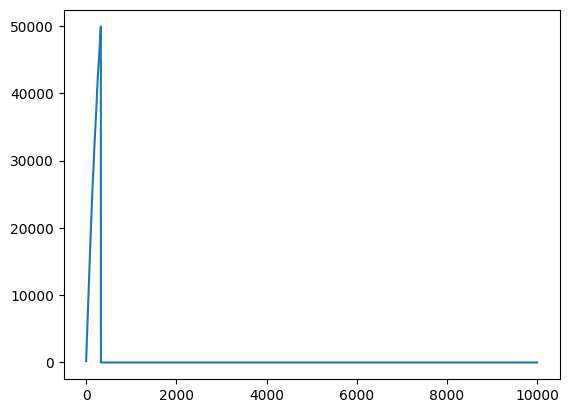

In [9]:
plt.plot(total_rewards)

In [29]:
agentQ.epsilon = 0
total_reward = test_policy(agentQ, env, max_steps=100)
#agentQ.epsilon = 0.1

Time step: 60
Action: 5
Reward: -10
Total reward: -600


KeyboardInterrupt: 

In [22]:
env.close()